## 응답 데이터 정보
- basDt         : 기준 일자
- crno          : 법인등록번호
- bizYear       : 사업연도
- fnclDcd       : 재무제표구분코드
- fnclDcdNm     : 재무제표구분코드명
- acitId        : 계정과목ID
- acitNm        : 계정과목명
- thqrAcitAmt   : 당분기계정과목금액
- crtmAcitAmt   : 당기계정과목금액
- lsqtAcitAmt   : 전분기계정과목금액
- pvtrAcitAmt   : 전기계정과목금액
- bpvtrAcitAmt  : 전전기계정과목금액
- curCd         : 통화 코드(KRW)

In [104]:
# financial_ss.csv 파일을 읽어서 DataFrame 에 저장
import pandas as pd

FILE_PATH = 'financial_ss.csv'
df = pd.read_csv(FILE_PATH, encoding='UTF-8')

df.head()
# => 첫번째 컬럼 데이터가 인덱스로서 사용되는 값으로 확인

df = pd.read_csv(FILE_PATH, encoding='UTF-8', index_col=0)
df.head()
# => index_col=0 : 첫번째 데이터(위치)를 인덱스로 선택

,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd
0,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW
1,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW
2,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW
3,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW
4,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW


In [105]:
# 컬럼별 데이터 타입 => dtypes
df.dtypes
df
# '기준일자' 컬럼(basDt) 타입을 Datetime으로 변경
# pd.to_datetime(대상) => '대상' 숫자 타입인 경우 포맷(형식) 지정
df['basDt'] = pd.to_datetime(df['basDt'], format='%Y%m%d')
df.dtypes
df.head()



,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd
0,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW
1,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW
2,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW
3,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW
4,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW


In [106]:
# 재무제표구분코드명(fnclDcdNm) 컬럼의 고유값 목록 확인
df['fnclDcdNm'].unique()

# 위 컬럼 데이터 중 연결재무제표 데이터만 선택
# * contains 함수 사용
df[df['fnclDcdNm'].str.contains('연결재무제표')]

# * [member] 제거하고, 공백 제거하여 '연결재무제표' 선택
df['fnclDcdNm_main'] = df['fnclDcdNm'].str.replace('[member]', '').str.strip()
df = df[df['fnclDcdNm_main'] == '연결재무제표']
df


,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd,fnclDcdNm_main
0,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW,연결재무제표
1,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW,연결재무제표
2,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW,연결재무제표
3,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW,연결재무제표
4,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW,연결재무제표
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_IssuedCapital,자본금,0,897514000000,0,897514000000,897514000000,KRW,연결재무제표
160,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_Liabilities,부채총계,0,112339878000000,0,92228115000000,93674903000000,KRW,연결재무제표
161,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_NoncurrentAssets,비유동자산,0,287469682000000,0,259969423000000,229953926000000,KRW,연결재무제표
162,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_NoncurrentLiabilities,비유동부채,0,19013579000000,0,16508663000000,15330051000000,KRW,연결재무제표


In [108]:
# 기준일자 컬럼 기준으로 오름차순 정렬. 인덱스행 초기화.
df = df.sort_values(by='basDt').reset_index(drop=True)
df

,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd,fnclDcdNm_main
0,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW,연결재무제표
1,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW,연결재무제표
2,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW,연결재무제표
3,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW,연결재무제표
4,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW,연결재무제표
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_CurrentAssets,유동자산,0,227062266000000,0,195936557000000,218470581000000,KRW,연결재무제표
82,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_CurrentLiabilities,유동부채,0,93326299000000,0,75719452000000,78344852000000,KRW,연결재무제표
83,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_IssuedCapital,자본금,0,897514000000,0,897514000000,897514000000,KRW,연결재무제표
84,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_Liabilities,부채총계,0,112339878000000,0,92228115000000,93674903000000,KRW,연결재무제표


In [110]:
# 계정과목명(acitNm) 컬럼의 고유값 확인
df['acitNm'].unique()

array(['자산총계', '유동자산', '유동부채', '자본총계', '부채총계', '비유동자산', '비유동부채',
       '이익잉여금(결손금)', '자본금', '이익잉여금'], dtype=object)

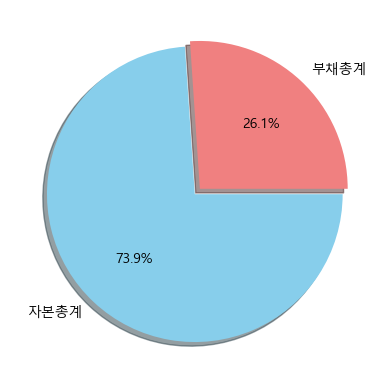

In [ ]:
# 계정과목이 '부채총계', '자본총계'인 데이터의 당기계정과목금액(crtmAcitAmt) 시각화

# '부채총계'
acit_0 = df[df['acitNm'] == '부채총계']
acit_0_amt = acit_0['crtmAcitAmt']

data0 = acit_0_amt.iloc[0]

# '자본총계'
data1 = df[df['acitNm'] == '자본총계']['crtmAcitAmt'].iloc[0]

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.pie([data0, data1], labels=['부채총계', '자본총계'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], explode=(0.05, 0), shadow=True)
plt.show()



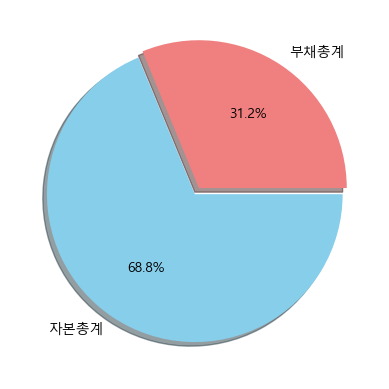

In [124]:
# 부채 총계, 자본 총계 -- 당기금액 총합을 시각화

# '부채총계'
acit_0 = df[df['acitNm'] == '부채총계']
acit_0_amt = acit_0['crtmAcitAmt']

data0 = acit_0_amt.sum()

# '자본총계'
data1 = df[df['acitNm'] == '자본총계']['crtmAcitAmt'].sum()

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.pie([data0, data1], labels=['부채총계', '자본총계'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], explode=(0.05, 0), shadow=True)
plt.show()

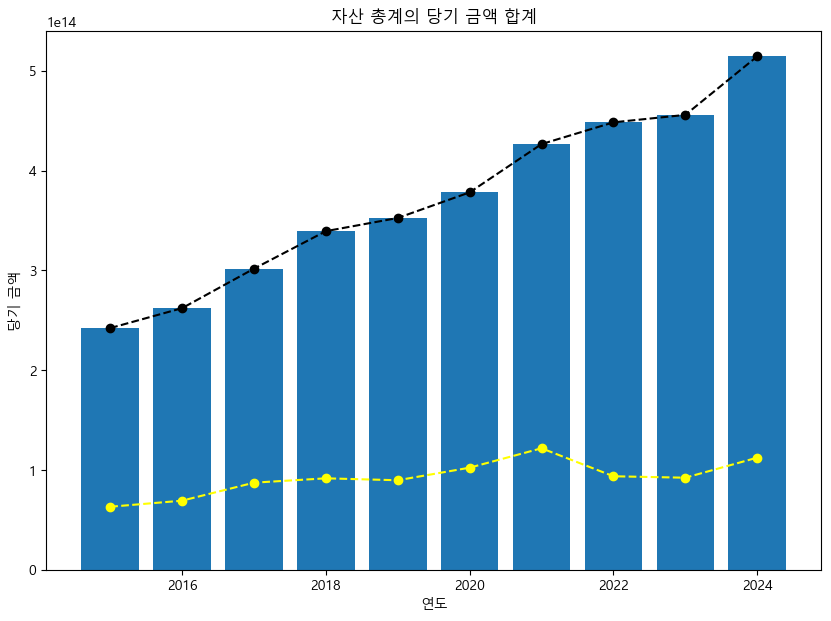

In [140]:
# '자산총계'의 당기 금액을 연도별로 시각화
data = df[df['acitNm'] == '자산총계'].groupby('bizYear')['crtmAcitAmt'].sum()
data2 = df[df['acitNm'] == '부채총계'].groupby('bizYear')['crtmAcitAmt'].sum()

plt.figure(figsize=(10, 7))
plt.plot(
  data,
  marker='o',
  linestyle='--',
  color='black'
)
plt.plot(
  data2,
  marker='o',
  linestyle='--',
  color='yellow'
)
plt.bar(
  data.index,
  data.values
)
plt.title('자산 총계의 당기 금액 합계')
plt.xlabel('연도')
plt.ylabel('당기 금액')
plt.show()